클러스터링
- 어떤 데이터들이 주어졌을 때, 특성이 비슷한 데이터끼리 묶어 주는 머신러닝 기법
- 머신러닝 알고리즘에 딥러닝을 적용한다면 성능이 더 향상될 수 있음

K-평균 군집화
1. 클러스터 중심인 중심점을 구하기 위해 임의의 점 K를 선택
2. 각 중심에 대한 거리를 계산하여 각 데이터를 가까운 클러스터에 할당
3. 할당된 데이터 평균을 계산하여 새로운 클러스터 중심을 결정
4. 클러스터 할당이 변경되지 않을 때까지 2~3을 반복
- 파이토치는 딥러닝을 위한 프레임워크이기 때문에 머신러닝 기법들을 간편하게 사용할 수 있는 방법들을 제공하지 않음
- 파이토치에서는 머신러닝 알고리즘이 수행해야 할 일들을 개발자가 일일히 함수로 구현해야 함
- 이러한 과정이 번거롭다면 간편하게 사이킷런(scikit-learn) 라이브러리를 사용해야 함

In [1]:
#파이토치로 K-평균 군집화 예제 구현하기
!pip install kmeans_pytorch

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from kmeans_pytorch import kmeans, kmeans_predict #K 평균 군집화
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
file_uploaded=files.upload()

Saving iris.csv to iris.csv


In [10]:
#데이터셋 불러오기
#- 아이리스(붓꽃) 데이터셋은 꽃잎의 너비와 길이 등을 측정한 데이터
#- 150개의 레코드로 구성
df=pd.read_csv('iris.csv')
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [9]:
df.info() #데이터 타입이 object이라면 float64로 바꾸어야 하기 때문에 사전 확인 필요함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
#워드 임베딩
#- oject라는 데이터 타입을 갖는 Species 컬럼은 숫자가 아닌 단어로 구성
#- 단어는 꽃잎의 너비와 길이에 따라 아이리스(붓꽃)의 세 가지 범주를 나타냄
#- 단어를 숫자로 바꾸어 주는 것 = 워드 임베딩. get_dummies() 사용
data = pd.get_dummies(df, columns=['Species'])
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,True,False,False
1,2,4.9,3.0,1.4,0.2,True,False,False
2,3,4.7,3.2,1.3,0.2,True,False,False
3,4,4.6,3.1,1.5,0.2,True,False,False
4,5,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,False,False,True
146,147,6.3,2.5,5.0,1.9,False,False,True
147,148,6.5,3.0,5.2,2.0,False,False,True
148,149,6.2,3.4,5.4,2.3,False,False,True


In [12]:
#데이터셋 분리
#- 훈련/테스트 용도로 데이터 셋 분리
#- 사이킷런 사용
#- 혹은 파이토치의 random_split() 사용 가능. 데이터셋의 인덱스를 텐서 형태로 반환하기 때문에, 인덱스가 아닌 데이터를 이용해야 하는 이번 예제와 맞지 않음
from sklearn.model_selection import train_test_split
x, y = train_test_split(data, test_size=0.2, random_state=123)

In [13]:
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
130,131,7.4,2.8,6.1,1.9,False,False,True
119,120,6.0,2.2,5.0,1.5,False,False,True
29,30,4.7,3.2,1.6,0.2,True,False,False
0,1,5.1,3.5,1.4,0.2,True,False,False
62,63,6.0,2.2,4.0,1.0,False,True,False
...,...,...,...,...,...,...,...,...
17,18,5.1,3.5,1.4,0.3,True,False,False
98,99,5.1,2.5,3.0,1.1,False,True,False
66,67,5.6,3.0,4.5,1.5,False,True,False
126,127,6.2,2.8,4.8,1.8,False,False,True


In [14]:
y

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
72,73,6.3,2.5,4.9,1.5,False,True,False
112,113,6.8,3.0,5.5,2.1,False,False,True
132,133,6.4,2.8,5.6,2.2,False,False,True
88,89,5.6,3.0,4.1,1.3,False,True,False
37,38,4.9,3.1,1.5,0.1,True,False,False
138,139,6.0,3.0,4.8,1.8,False,False,True
87,88,6.3,2.3,4.4,1.3,False,True,False
42,43,4.4,3.2,1.3,0.2,True,False,False
8,9,4.4,2.9,1.4,0.2,True,False,False
90,91,5.5,2.6,4.4,1.2,False,True,False


In [15]:
if torch.cuda.is_available():
  device = torch.device('cuda:0')
else:
  device = torch.device('cpu')

In [17]:
#특성 스케일링
#- 범위가 평균은 0, 분산이 1이 되도록 조정 = 특성 스케일링(feature scaling)
#- 대표적인 방법으로는 표준화(standardization), 정규화(normalization)
#- 이번 예제는 표준화 사용
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler() #StandardScaler() 각 특성의 평균을 0, 분산을 1로 변경하여 특성의 스케일 변경
x_scaled=scaler.fit(data).transform(x) #fit 평균과 표준편차 계산 #transform 계산된 평균과 표준편차 적용
y_scaled=scaler.fit(y).transform(y)

In [18]:
#텐서로 변경하기
x = torch.from_numpy(x_scaled)
y = torch.from_numpy(y_scaled)

In [21]:
#훈련과 테스트 데이터셋 크기
print(x.size()) #훈련 데이터셋에 대한 크기 -> 120개
print(y.size()) #테스트 데이터셋에 대한 크기 -> 30개
print(x) #텐서로 변경된 훈련 데이터셋의 데이터 확인

torch.Size([120, 8])
torch.Size([30, 8])
tensor([[ 1.2817e+00,  1.8862e+00, -5.8776e-01,  1.3314e+00,  9.2206e-01,
         -7.0711e-01, -7.0711e-01,  1.4142e+00],
        [ 1.0277e+00,  1.8983e-01, -1.9762e+00,  7.0589e-01,  3.9617e-01,
         -7.0711e-01, -7.0711e-01,  1.4142e+00],
        [-1.0508e+00, -1.3854e+00,  3.3785e-01, -1.2275e+00, -1.3130e+00,
          1.4142e+00, -7.0711e-01, -7.0711e-01],
        [-1.7205e+00, -9.0068e-01,  1.0321e+00, -1.3413e+00, -1.3130e+00,
          1.4142e+00, -7.0711e-01, -7.0711e-01],
        [-2.8868e-01,  1.8983e-01, -1.9762e+00,  1.3724e-01, -2.6119e-01,
         -7.0711e-01,  1.4142e+00, -7.0711e-01],
        [ 4.2725e-01, -1.0218e+00, -1.7448e+00, -2.6082e-01, -2.6119e-01,
         -7.0711e-01,  1.4142e+00, -7.0711e-01],
        [ 1.3048e+00,  2.4920e+00,  1.7263e+00,  1.5020e+00,  1.0535e+00,
         -7.0711e-01, -7.0711e-01,  1.4142e+00],
        [-1.6051e+00, -5.3718e-01,  1.9577e+00, -1.1707e+00, -1.0500e+00,
          1.4142e+00, -7

In [32]:
#K-평균 군집화 적용
num_clusters = 3 #아이리스(붓꽃) 유형이 세 개라서 3으로 지정
cluster_ids_x, cluster_centers = kmeans(
    X=x, #훈련 데이터셋
    num_clusters=num_clusters, #클러스터 개수
    distance='euclidean', #클러스터를 구성하기 위한 데이터 간의 거리 계산 방법
    device=device
)
#center_shift; 유클리드 거리 계산을 이용하여 반복적으로 클러스터 중심을 변경
#iteration; 중지할 기준(tol)을 만족하면 학습을 멈추고 반복 횟수를 출력
#tol; tolerance의 약자로, 학습을 중지할 기준이 되는 값
#> 주어진 데이터에 대해 k-means 알고리즘이 4번의 반복을 수행하였고, 중심점의 이동이 거의 없어서 알고리즘이 수행되었습니다. 이는 클러스터링 결과가 안정화되었음을 의미함.


running k-means on cpu..


[running kmeans]: 4it [00:00, 290.66it/s, center_shift=0.000000, iteration=4, tol=0.000100]


In [26]:
print(cluster_ids_x)

tensor([0, 0, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 2, 0, 2, 2, 1,
        1, 1, 1, 0, 1, 0, 2, 0, 1, 2, 2, 0, 1, 0, 0, 2, 1, 1, 0, 2, 0, 1, 1, 2,
        0, 0, 2, 2, 1, 1, 0, 2, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 2, 2, 1, 0, 1, 1,
        1, 2, 2, 1, 0, 2, 2, 1, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1,
        2, 1, 1, 2, 1, 0, 1, 0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 1, 1, 0, 0])


In [27]:
print(cluster_centers)

tensor([[ 1.1509,  0.9013, -0.2199,  1.0354,  1.0906, -0.7071, -0.7071,  1.4142],
        [-0.0063,  0.1292, -0.6246,  0.2742,  0.1631, -0.7071,  1.4142, -0.7071],
        [-1.1850, -1.0022,  0.8757, -1.3028, -1.2384,  1.4142, -0.7071, -0.7071]])


In [28]:
#K-평균 군집화 예측 (테스트 데이터셋 이용)
cluster_ids_y = kmeans_predict( #예측을 위해서는 kmeans_predict() 사용
    y, cluster_centers, 'euclidean', device=device
)

predicting on cpu..


In [29]:
print(cluster_ids_y)

tensor([1, 0, 0, 1, 2, 0, 1, 2, 2, 1, 0, 2, 1, 0, 0, 0, 2, 2, 1, 2, 2, 0, 2, 0,
        2, 2, 2, 0, 0, 2])


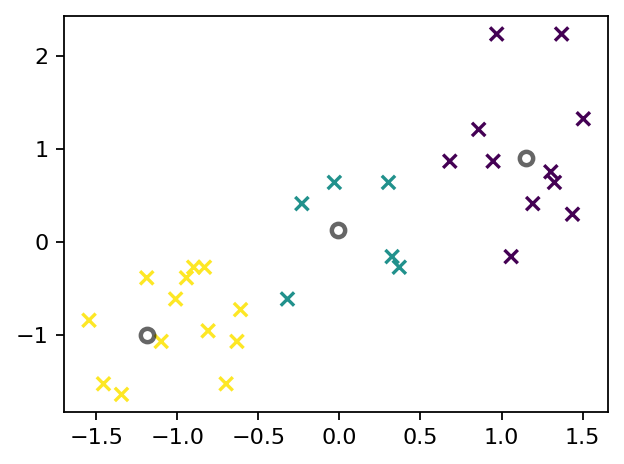

In [31]:
#예측 결과 그래프 확인
import matplotlib.pyplot as plt

plt.figure(figsize=(4,3), dpi=160)
plt.scatter(y[:,0],y[:,1], c=cluster_ids_y, cmap='viridis', marker='x') #테스트 데이터셋에 적용된 클러스터 결과 출력

plt.scatter(
    cluster_centers[:,0], cluster_centers[:,1],
    c='white',
    alpha=0.6, #투명도 60%
    edgecolors='black', #매개변수 테두리 검정색
    linewidths=2 #테두리선 너비 2
)

plt.tight_layout() #그래프가 레이아웃 겹치지 않도록, 자동으로 맞추어서 출력
plt.show()